In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split  # 划分训练集与测试集
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn import metrics      # 模型评估模块
import graphviz                # 图形可视化，用户可视化决策树
from sklearn import tree       # sklearn中的树模块，用于导出决策数的dot格式
from sklearn.model_selection import ParameterGrid, GridSearchCV  # 网格搜索

In [2]:
acc1 = pd.read_csv("data1.csv", encoding='gbk')
print(acc1)

     计数 年龄 收入 学生 信誉  归类
0    64  青  高  否  良  不买
1    64  青  高  否  优  不买
2   128  中  高  否  良   买
3    60  老  中  否  良   买
4    64  老  低  是  良   买
5    64  老  低  是  优  不买
6    64  中  低  是  优   买
7   128  青  中  否  良  不买
8    64  青  低  是  良   买
9   132  老  中  是  良   买
10   64  青  中  是  优   买
11   32  中  中  否  优   买
12   32  中  高  是  良   买
13   63  老  中  否  优  不买
14    1  老  中  否  优   买


In [3]:
accepts = acc1.drop("计数", axis=1)

In [4]:
accepts

,年龄,收入,学生,信誉,归类
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买


In [25]:
names = accepts.columns.to_list()

In [26]:
data = accepts[names]
data

,年龄,收入,学生,信誉,归类
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买


In [28]:
X = data.drop("归类", axis=1)  # 特征
y = data["归类"]  # 目标变量

In [20]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [36]:
# 定义各列的顺序（如果有）
age_order = ["青", "中", "老"]          # 年龄：青 < 中 < 老
income_order = ["低", "中", "高"]       # 收入：低 < 中 < 高
credit_order = ["良", "优"]             # 信誉：假设 "良" < "优"

# 使用 OrdinalEncoder 转换有序分类变量
encoder = OrdinalEncoder(categories=[age_order, income_order, ["否", "是"], credit_order])
print(encoder)
X_encoded = encoder.fit_transform(X[["年龄", "收入", "学生", "信誉"]])

# 转换为 DataFrame（可选）
X_encoded = pd.DataFrame(X_encoded, columns=["年龄", "收入", "学生", "信誉"])
print(X_encoded)

# 处理目标变量（归类）
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # "买"→1, "不买"→0

OrdinalEncoder(categories=[['青', '中', '老'], ['低', '中', '高'], ['否', '是'],
                           ['良', '优']])
     年龄   收入   学生   信誉
0   0.0  2.0  0.0  0.0
1   0.0  2.0  0.0  1.0
2   1.0  2.0  0.0  0.0
3   2.0  1.0  0.0  0.0
4   2.0  0.0  1.0  0.0
5   2.0  0.0  1.0  1.0
6   1.0  0.0  1.0  1.0
7   0.0  1.0  0.0  0.0
8   0.0  0.0  1.0  0.0
9   2.0  1.0  1.0  0.0
10  0.0  1.0  1.0  1.0
11  1.0  1.0  0.0  1.0
12  1.0  2.0  1.0  0.0
13  2.0  1.0  0.0  1.0
14  2.0  1.0  0.0  1.0


In [23]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=20)
clf.fit(X_encoded, y_encoded)

# 预测
y_pred = clf.predict(X_encoded)
print("预测结果:", y_pred)

预测结果: [0 0 1 1 1 0 1 0 1 1 1 1 1 0 0]


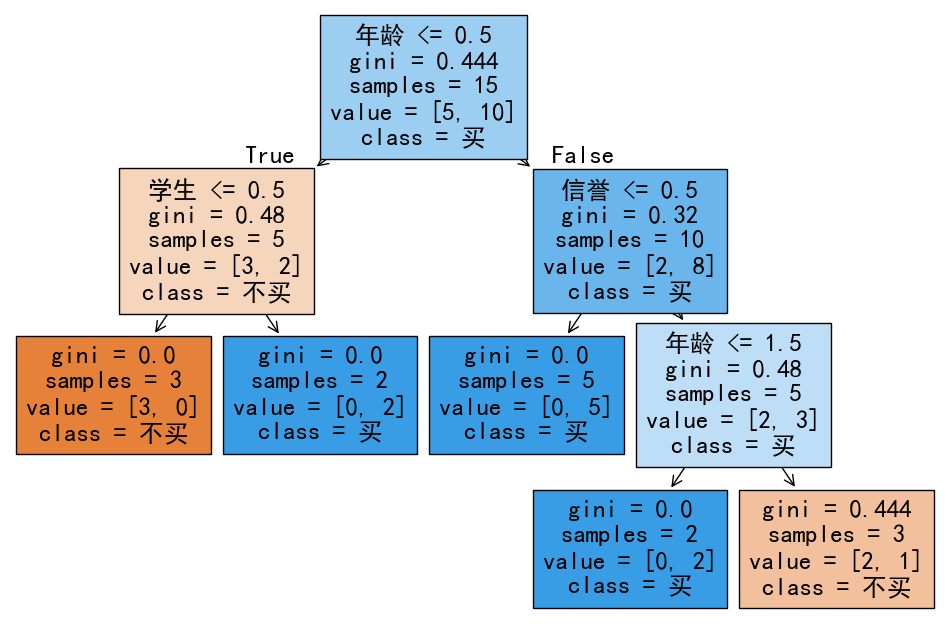

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# 设置支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X_encoded.columns, class_names=["不买", "买"], filled=True)
plt.show()